In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("/content/car data.csv")
df.sample(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
75,etios g,2015,3.95,6.800,36000,Petrol,Dealer,Manual,0
237,creta,2015,11.25,13.600,68000,Diesel,Dealer,Manual,0
215,verna,2012,4.50,9.400,36100,Petrol,Dealer,Manual,0
25,swift,2011,3.00,4.990,20000,Petrol,Dealer,Manual,0
68,corolla altis,2011,4.35,13.740,88000,Petrol,Dealer,Manual,0
20,alto k10,2016,2.85,3.950,25000,Petrol,Dealer,Manual,0
55,corolla altis,2009,3.60,15.040,70000,Petrol,Dealer,Automatic,0
73,etios liva,2011,2.65,5.710,43000,Petrol,Dealer,Manual,0
175,Hero Honda CBZ extreme,2011,0.38,0.787,75000,Petrol,Individual,Manual,0
119,Royal Enfield Thunder 500,2013,1.05,1.900,5400,Petrol,Individual,Manual,0


In [16]:
df.drop_duplicates(inplace=True)

In [19]:
print(df.duplicated().sum())
print(df.isnull().sum())

0
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


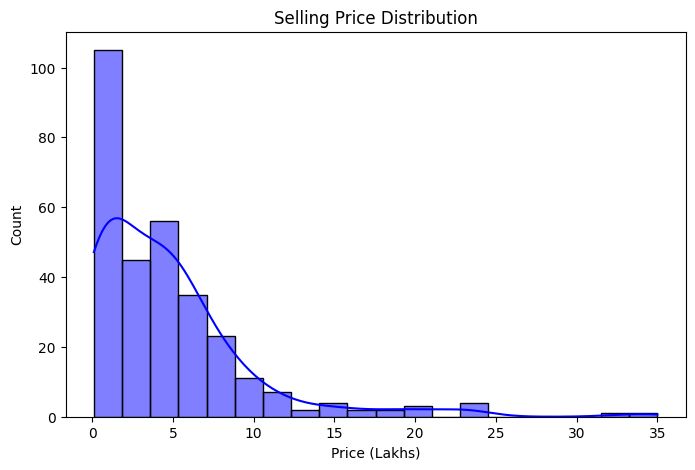

In [23]:

plt.figure(figsize=(8,5))
sns.histplot(df["Selling_Price"], bins=20, kde=True, color="blue")
plt.title("Selling Price Distribution")
plt.xlabel("Price (Lakhs)")
plt.ylabel("Count")
plt.show()

 Insights from Visualizations

1️⃣ Selling Price Distribution

The price data is right-skewed, meaning most cars are in the lower price range.

This may require log transformation or scaling for better predictions.

<ipython-input-24-a39f01a83d99>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Fuel_Type"], palette="pastel")


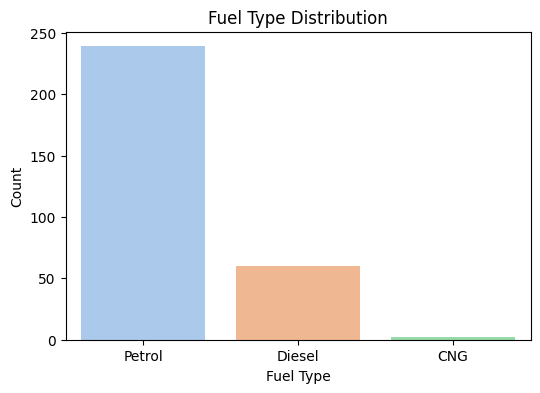

In [24]:

plt.figure(figsize=(6,4))
sns.countplot(x=df["Fuel_Type"], palette="pastel")
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()


2️⃣ Fuel Type Distribution

Most cars use Petrol, followed by Diesel and CNG.

This feature might influence price due to fuel efficiency & maintenance costs.

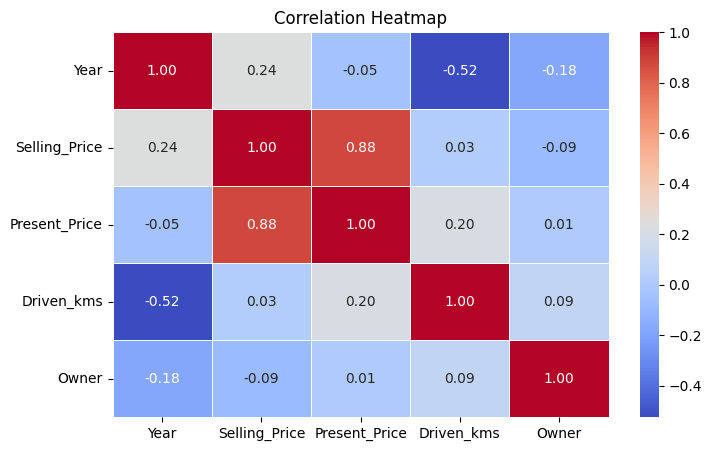

In [25]:
df_numeric = df.select_dtypes(include=['number'])
plt.figure(figsize=(8,5))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

3️⃣ Correlation Heatmap

Present_Price and Selling_Price have a strong correlation (0.88).

Year has a negative correlation, meaning older cars have lower prices.

Driven_kms and Owner have weaker correlations, so they might need transformation.


In [26]:
df.drop(columns=['Car_Name'], inplace=True)
df_encoded = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)
df_encoded.head()


,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,True,False,True
1,2013,4.75,9.54,43000,0,True,False,False,True
2,2017,7.25,9.85,6900,0,False,True,False,True
3,2011,2.85,4.15,5200,0,False,True,False,True
4,2014,4.60,6.87,42450,0,True,False,False,True


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

X = df_encoded.drop(columns=['Selling_Price'])
y = df_encoded['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2, rmse


(0.8488707839191938, np.float64(1.865837568094988))